In [24]:
import os

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Get all file name in current folder
files = os.listdir()
df_list = []
for fname in files:
    if fname[-8:] != ".parquet":
        continue
    model_name = fname[:-8]
    df_res = pd.read_parquet(fname)
    df_res["model"] = model_name
    df_list.append(df_res)
df_results = pd.concat(df_list).reset_index(drop=True)
df_results

,epoch,train_loss,val_auc,val_precision,val_recall,val_f1,model
0,0,0.419770,0.928877,0.835279,0.874043,0.854221,gs_adv_noemb_2gnn
1,1,0.312150,0.941579,0.851877,0.888427,0.869768,gs_adv_noemb_2gnn
2,2,0.301638,0.943462,0.857284,0.887528,0.872144,gs_adv_noemb_2gnn
3,3,0.296791,0.944524,0.856794,0.892333,0.874203,gs_adv_noemb_2gnn
4,4,0.291739,0.946067,0.860065,0.894194,0.876797,gs_adv_noemb_2gnn
...,...,...,...,...,...,...,...
119,0,0.469568,0.931729,0.842177,0.877763,0.859602,gat_512d_8h
120,1,0.318624,0.938609,0.850742,0.881731,0.865959,gat_512d_8h
121,2,0.306215,0.941736,0.853957,0.885699,0.869539,gat_512d_8h
122,3,0.301101,0.943544,0.846852,0.903060,0.874053,gat_512d_8h


In [27]:
models = df_results["model"].unique().tolist()
models

['gs_adv_noemb_2gnn',
 'gat_128d_2h',
 'gs_base_noemb',
 'gs_adv_noemb',
 'gat_512d_4h',
 'gat_256d_2h',
 'gs_base_emb',
 'gs_adv_noemb_2gnn_128d',
 'gs_adv_emb',
 'gs_adv_noemb_2gnn_512d',
 'gat_128d_1h',
 'gat_256d_4h',
 'gat_512d_8h']

In [55]:
model_desc = {
    'gs_adv_noemb_2gnn': 'GraphSAGE 2 layers, 256d',
    'gat_128d_2h': 'GAT (128d, 2 heads)',
    'gs_base_noemb': 'GraphSAGE vallina, baseline features',
    'gs_adv_noemb': 'GraphSAGE vallina, advanced features',
    'gat_512d_4h': 'GAT (512d, 4 heads)',
    'gat_256d_2h': 'GAT (256d, 2 heads)',
    'gs_base_emb': 'GraphSAGE + NCF, baseline features',
    'gs_adv_noemb_2gnn_128d': 'GraphSAGE 2 layers, 128d',
    'gs_adv_emb': 'GraphSAGE + NCF, advanced features',
    'gs_adv_noemb_2gnn_512d': 'GraphSAGE 2 layers, 512d',
    'gat_128d_1h': 'GAT (128d, 1 head)',
    'gat_256d_4h': 'GAT (256d, 4 heads)',
    'gat_512d_8h': 'GAT (512d, 8 heads)',
}
df_results["model_desc"] = df_results["model"].map(model_desc)

In [57]:
exp1_models = ["gs_base_noemb", "gs_base_emb", "gs_adv_noemb", "gs_adv_emb"]

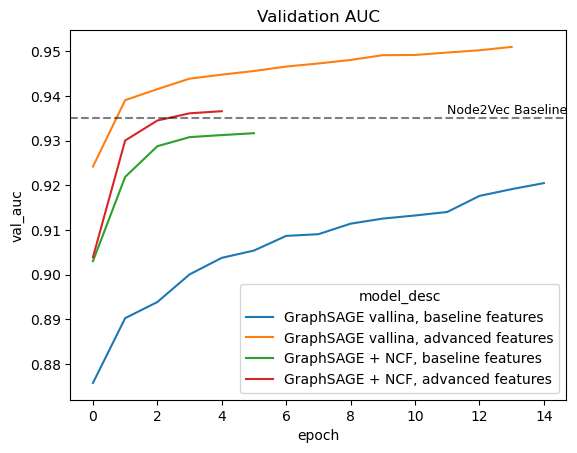

In [58]:
n2v_baseline = 0.935
ax = sns.lineplot(data=df_results[df_results["model"].isin(exp1_models)], x="epoch", y="val_auc", hue="model_desc")
ax.set_title("Validation AUC")
ax.axhline(n2v_baseline, ls='--', color='black', alpha=0.5)
ax.text(11,n2v_baseline * 1.001, "Node2Vec Baseline", color='black', fontsize=9)
plt.show()

<AxesSubplot:xlabel='epoch', ylabel='train_loss'>

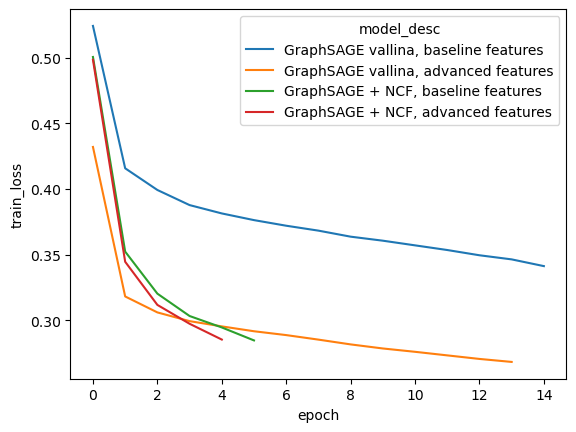

In [59]:
sns.lineplot(data=df_results[df_results["model"].isin(exp1_models)], x="epoch", y="train_loss", hue="model_desc")

In [32]:
[m for m in models if m not in exp1_models]

['gs_adv_noemb_2gnn',
 'gat_128d_2h',
 'gat_512d_4h',
 'gat_256d_2h',
 'gs_adv_noemb_2gnn_128d',
 'gs_adv_noemb_2gnn_512d',
 'gat_128d_1h',
 'gat_256d_4h',
 'gat_512d_8h']

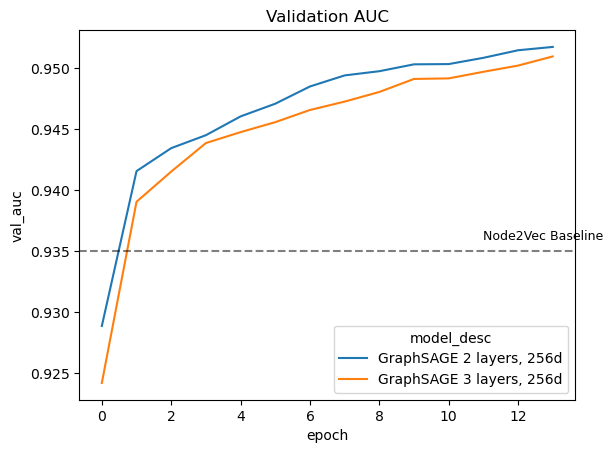

In [64]:
# Experiment 2b
exp2a_models = ["gs_adv_noemb", "gs_adv_noemb_2gnn"]
df_ = df_results[df_results["model"].isin(exp2a_models)].copy()
df_.loc[df_["model"]=="gs_adv_noemb", "model_desc"] = "GraphSAGE 3 layers, 256d"
ax = sns.lineplot(data=df_, x="epoch", y="val_auc", hue="model_desc")
ax.set_title("Validation AUC")
ax.axhline(n2v_baseline, ls='--', color='black', alpha=0.5)
ax.text(11,n2v_baseline * 1.001, "Node2Vec Baseline", color='black', fontsize=9)
plt.show()

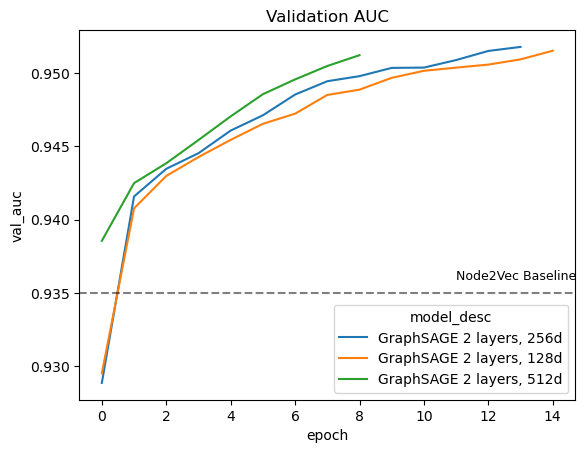

In [65]:
# Experiment 2b
exp2b_models = ["gs_adv_noemb_2gnn", "gs_adv_noemb_2gnn_128d", "gs_adv_noemb_2gnn_512d"]
ax = sns.lineplot(data=df_results[df_results["model"].isin(exp2b_models)], x="epoch", y="val_auc", hue="model_desc")
ax.set_title("Validation AUC")
ax.axhline(n2v_baseline, ls='--', color='black', alpha=0.5)
ax.text(11,n2v_baseline * 1.001, "Node2Vec Baseline", color='black', fontsize=9)
plt.show()

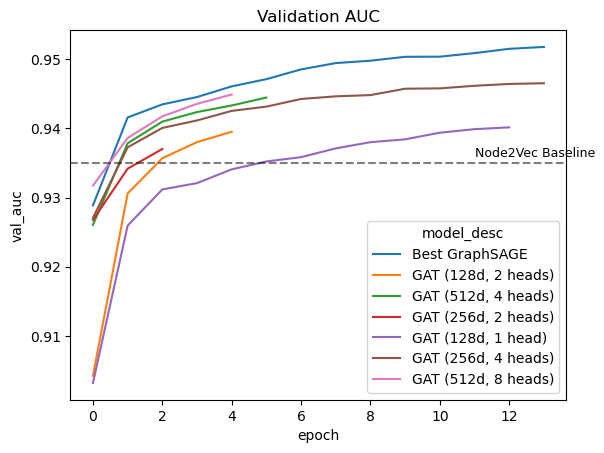

In [68]:
# Experiment 3
exp3_models = ["gs_adv_noemb_2gnn", "gat_128d_1h", "gat_128d_2h", "gat_256d_2h", "gat_256d_4h", "gat_512d_4h", "gat_512d_8h"]
df_ = df_results[df_results["model"].isin(exp3_models)].copy()
df_.loc[df_["model"]=="gs_adv_noemb_2gnn", "model_desc"] = "Best GraphSAGE"
ax = sns.lineplot(data=df_, x="epoch", y="val_auc", hue="model_desc")
ax.set_title("Validation AUC")
ax.axhline(n2v_baseline, ls='--', color='black', alpha=0.5)
ax.text(11,n2v_baseline * 1.001, "Node2Vec Baseline", color='black', fontsize=9)
plt.show()